# Lab 05 : Compression, Morphological Processing, Segmentation

## 01. Compression

In [ ]:
from PIL import Image
import os

# Upload your image
from google.colab import files


# Load the image
image_path = '/content/Cartoon_illustration.jpg'
original_image = Image.open(image_path)

# Show image info
print("Format:", original_image.format)
print("Size:", original_image.size)
print("File size (KB):", round(os.path.getsize(image_path)/1024, 2))
original_image.show()


Format: JPEG
Size: (960, 1165)
File size (KB): 293.73


Step 1: Lossless Compression (PNG)

In [ ]:
# Convert and save as PNG (lossless)
lossless_path = "cartoon_lossless.png"
original_image.save(lossless_path, format="PNG", optimize=True)

# File size
print("PNG File Size (KB):", round(os.path.getsize(lossless_path) / 1024, 2))

# Download (optional)
files.download(lossless_path)


PNG File Size (KB): 1487.56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 2: Lossy Compression (JPEG - quality 50)

In [ ]:
# Save JPEG with quality 50
lossy_path = "cartoon_lossy_50.jpg"
original_image.save(lossy_path, format="JPEG", quality=50)

# File size
print("JPEG (q=50) File Size (KB):", round(os.path.getsize(lossy_path) / 1024, 2))

# Download (optional)
files.download(lossy_path)


JPEG (q=50) File Size (KB): 145.68


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 3: WebP Compression (modern, quality 50)

In [ ]:
# Save as WebP
webp_path = "cartoon_webp_50.webp"
original_image.save(webp_path, format="WEBP", quality=50)

# File size
print("WebP (q=50) File Size (KB):", round(os.path.getsize(webp_path) / 1024, 2))

# Download (optional)
files.download(webp_path)


WebP (q=50) File Size (KB): 119.54


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Original Image:


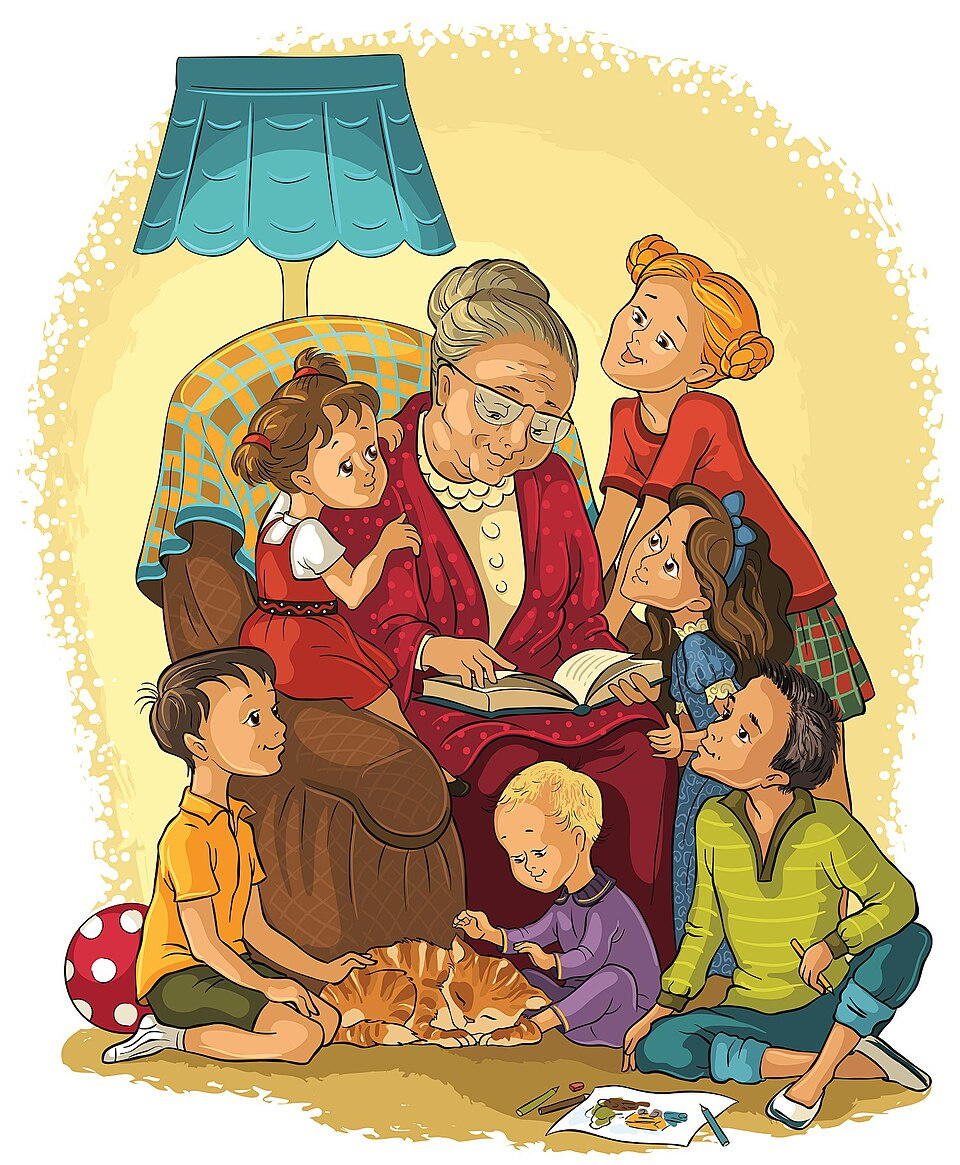

Lossy JPEG:


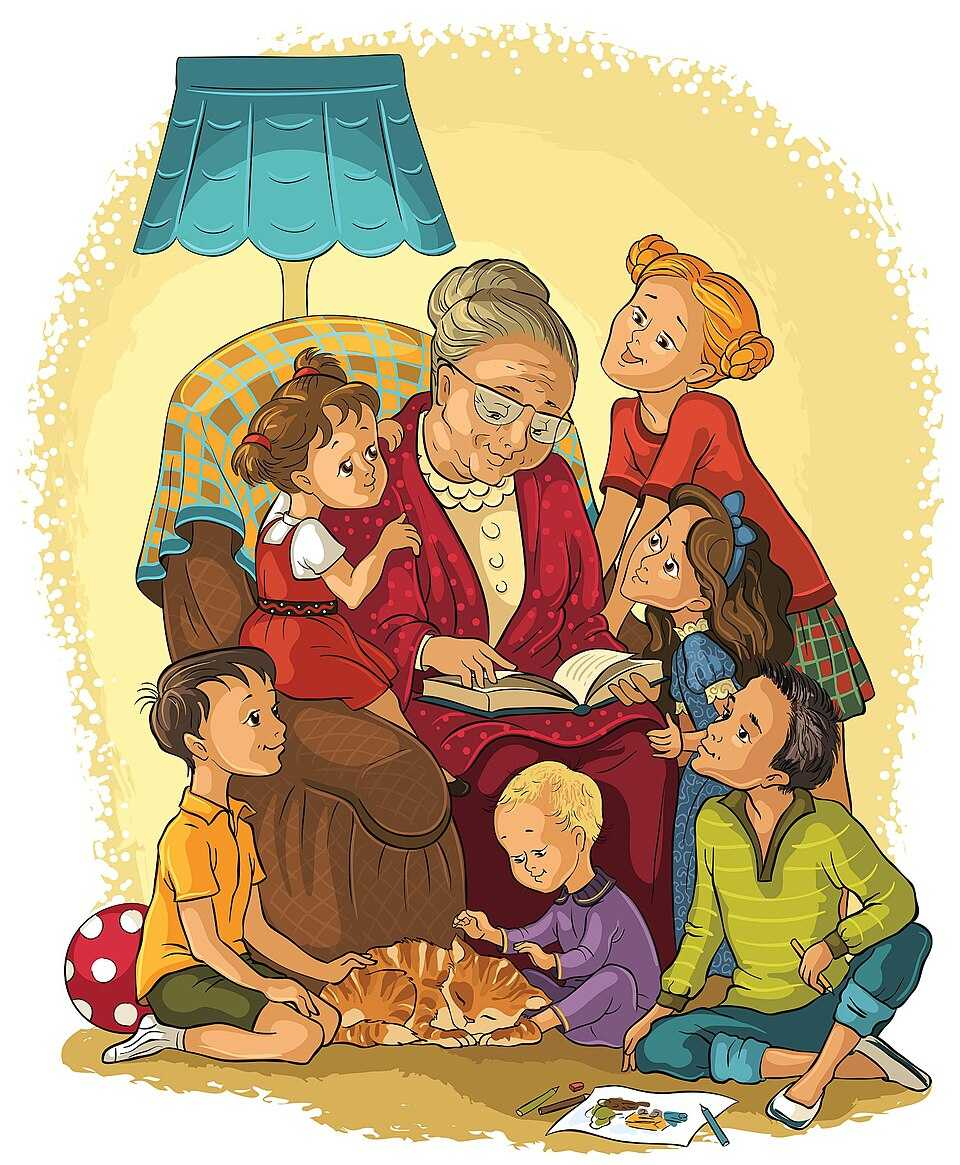

WebP:


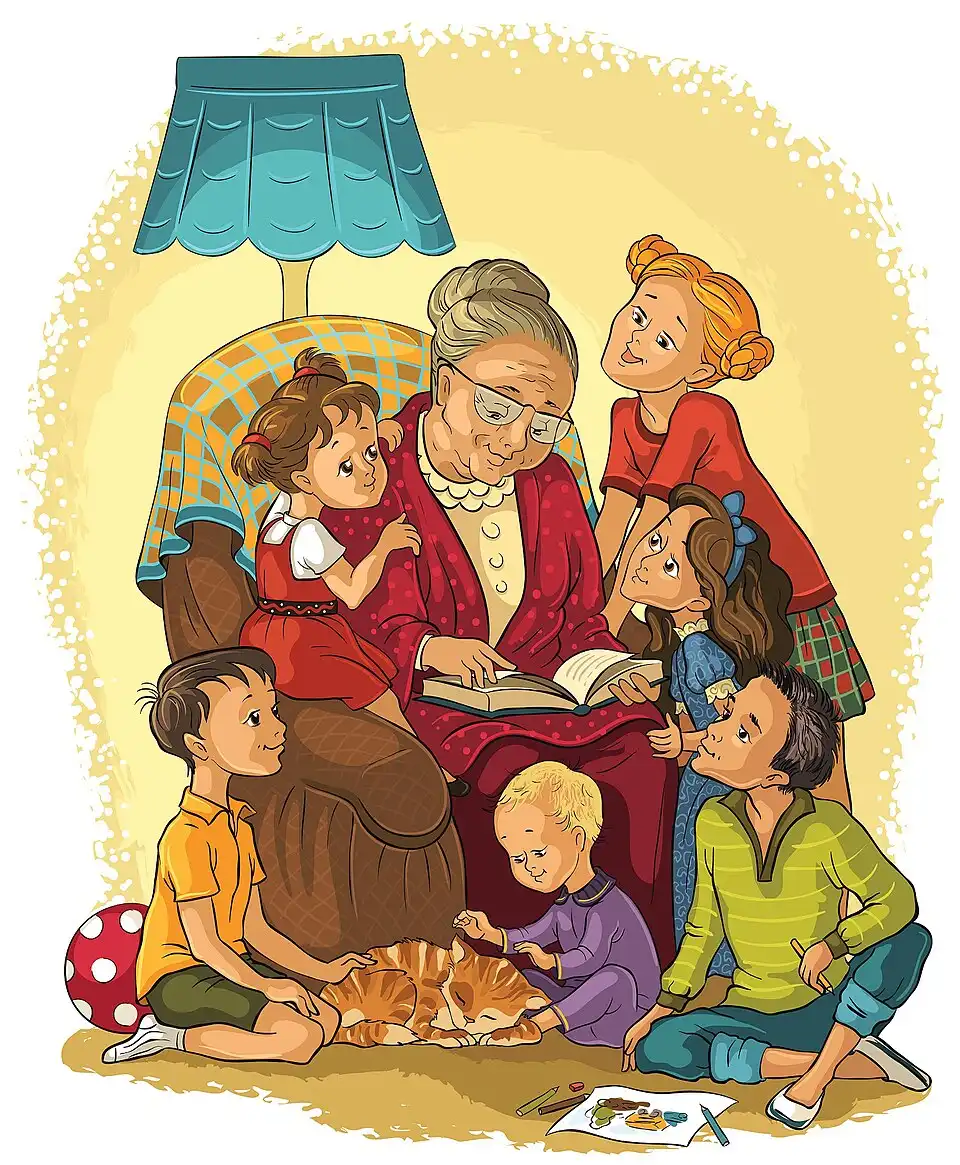

In [ ]:
from IPython.display import display

print("Original Image:")
display(original_image)

print("Lossy JPEG:")
display(Image.open(lossy_path))

print("WebP:")
display(Image.open(webp_path))


## 02. Morphological Processing

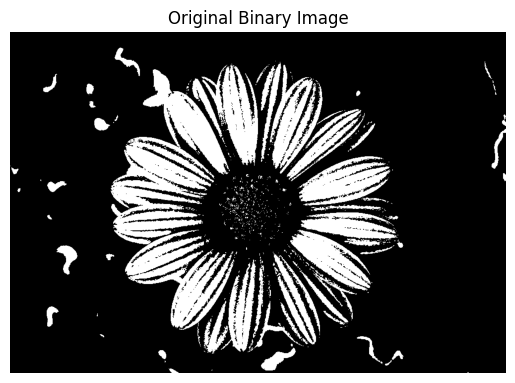

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload a binary or grayscale image

image_path = '/content/binary_image.png'

# Read the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold to binary
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')
plt.show()


Step 1: Define a Structuring Element

In [ ]:
# Kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)


Step 2: Erosion

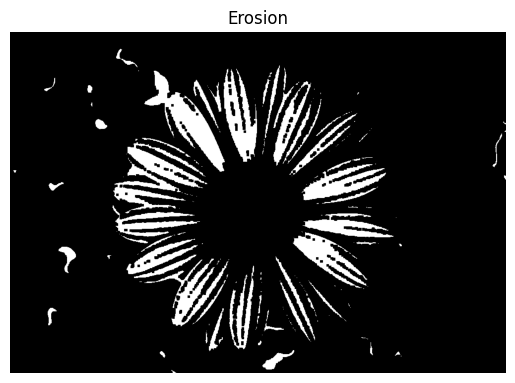

In [ ]:
erosion = cv2.erode(binary, kernel, iterations=1)

plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis('off')
plt.show()


Step 3: Dilation

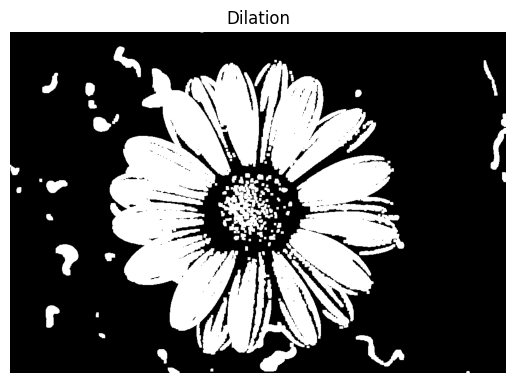

In [ ]:
dilation = cv2.dilate(binary, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis('off')
plt.show()


Step 4: Opening (Erosion followed by Dilation)

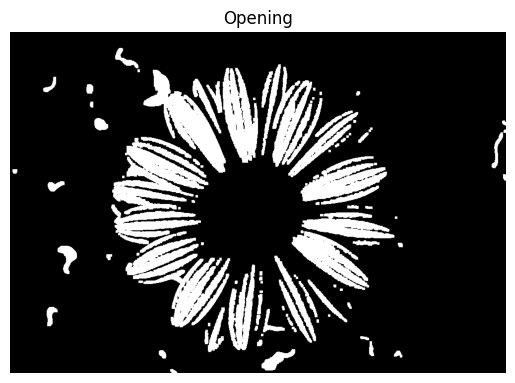

In [ ]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')
plt.show()


Step 6: Morphological Gradient (Dilation - Erosion)

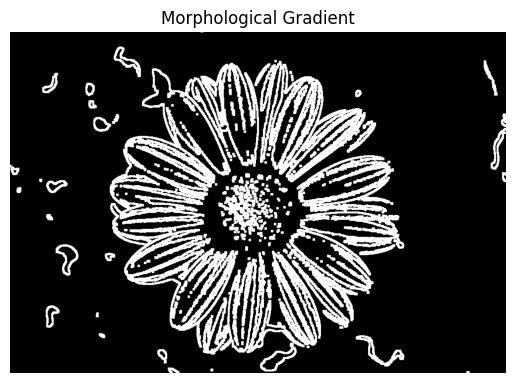

In [ ]:
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient, cmap='gray')
plt.title("Morphological Gradient")
plt.axis('off')
plt.show()


## 03. Segmentation

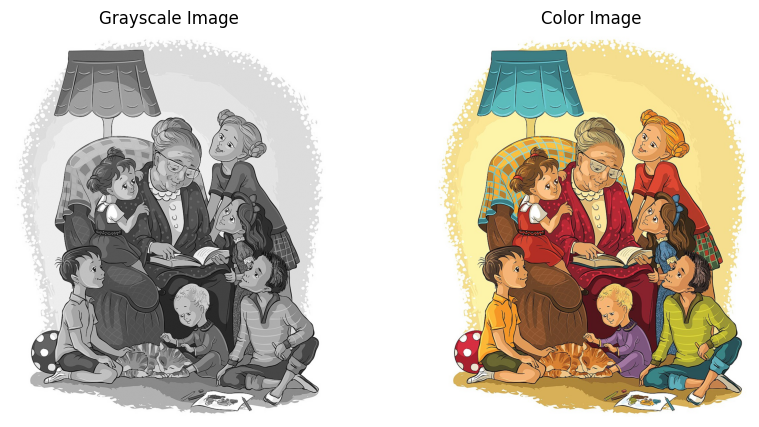

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload an image

image_path = '/content/Cartoon_illustration.jpg'

# Read the image in grayscale and color
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
color = cv2.imread(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
plt.title("Color Image")
plt.axis('off')
plt.show()



Step 1: Thresholding (Global)

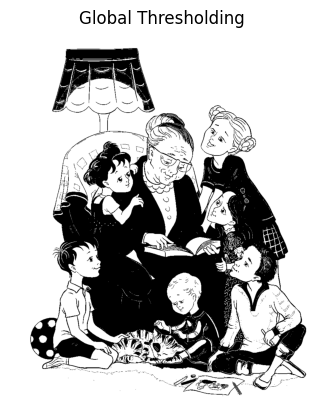

In [ ]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')
plt.show()


Step 2: Adaptive Thresholding

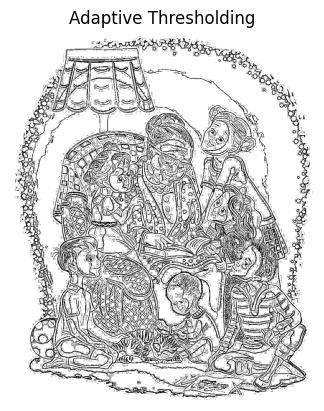

In [ ]:
adaptive = cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()


Step 3: Otsu’s Thresholding (Automatic)

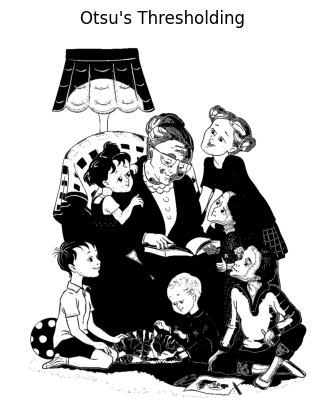

In [ ]:
_, otsu = cv2.threshold(gray, 0, 255,
                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()


Step 4: K-Means Clustering (Color Image)

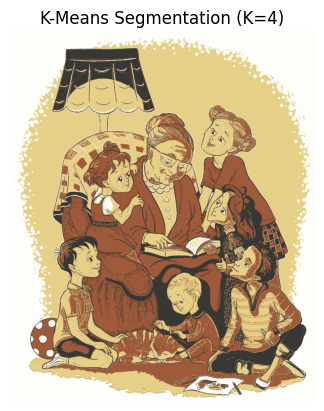

In [ ]:
# Reshape the image
Z = color.reshape((-1, 3))
Z = np.float32(Z)

# Define criteria and apply k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4  # number of clusters
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to image
centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented_image = segmented.reshape(color.shape)

plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title(f"K-Means Segmentation (K={K})")
plt.axis('off')
plt.show()


Step 5: Watershed Segmentation (Advanced)

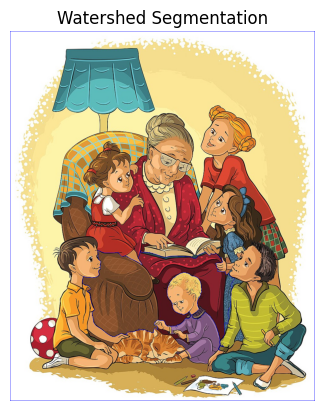

In [ ]:
# Convert to grayscale and apply threshold
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphology
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
color_copy = color.copy()
markers = cv2.watershed(color_copy, markers)
color_copy[markers == -1] = [255, 0, 0]  # Red boundary

plt.imshow(cv2.cvtColor(color_copy, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()


In [8]:
import heapq
from collections import defaultdict, Counter


data = "BCAADDDCCACACAC".replace(" ", "")  # Remove spaces


freq = Counter(data)
print("Character Frequencies:", freq)
freq_bit = sum(freq.values())
print("Total String:", sum(freq.values()))


heap = [[weight, [char, ""]] for char, weight in freq.items()]
heapq.heapify(heap)

while len(heap) > 1:
    lo = heapq.heappop(heap)
    hi = heapq.heappop(heap)
    for pair in lo[1:]:
        pair[1] = '0' + pair[1]
    for pair in hi[1:]:
        pair[1] = '1' + pair[1]
    heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])


huff_codes = sorted(heap[0][1:], key=lambda p: (len(p[-1]), p))
print("\nHuffman Codes:")
for ch, code in huff_codes:
    print(f"{ch}: {code}")


original_size = len(data) * 8
compressed_data = ''.join(dict(huff_codes)[ch] for ch in data)
compressed_size = len(compressed_data)
codebook_size = len(huff_codes) * 8

total_compressed = compressed_size + codebook_size + freq_bit


print(f"\nOriginal size: {original_size} bits")
print(f"\nFrequency in string :{freq_bit} bits")
print(f"Compressed size (data only): {compressed_size} bits")
print(f"Codebook size : {codebook_size} bits")
print(f"Total after compression: {total_compressed} bits")


Character Frequencies: Counter({'C': 6, 'A': 5, 'D': 3, 'B': 1})
Total String: 15

Huffman Codes:
C: 0
A: 11
B: 100
D: 101

Original size: 120 bits

Frequency in string :15 bits
Compressed size (data only): 28 bits
Codebook size : 32 bits
Total after compression: 75 bits
